In [1]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math 

In [2]:
DISCRIPTION_FILE_PATH = "/cs/labs/michall/roeizucker/phewas_run/discription10.csv"

In [3]:
discription_df = pd.read_csv(DISCRIPTION_FILE_PATH)

In [4]:
# discription_df.sort_values(by=["icd_codes","name"])[discription_df.sort_values(by=["name"])["name"].str.contains( "D649")]
# names = set(filter(lambda x: x[-2:]!="_M" and x[-2:] != "_F"  ,discription_df["name"].unique()))
# for name in names:
#     print(len(discription_df.sort_values(by=["icd_codes","name"])[discription_df.sort_values(by=["name"])["name"].str.contains( name)]))

baddies = {"Phecode_681.5","Phecode_981.0","Phecode_681.3","Z864","Z867","Z87"}



In [5]:
sorted_df = discription_df.sort_values(by=["icd_codes","name"])

In [6]:
sorted_df[sorted_df["name"].str.contains("Phecode_913.0")]

,Unnamed: 0,name,num_of_cases,num_of_controls,num_relevant_genes,num_relevant_genes_0.1,result_file_path,sex,description,icd_codes,data_type,source,dataset_path,dataset_column,overall_number,prevalence,MF_prevalence_ratio,FM_prevalence_ratio,overall_number_of_participants
4727,4502,Phecode_913.0,109,274715,-1,-1,NaN,B,Superficial injury without mention of infection,['T631'; 'T638'; 'T632'; 'T636'; 'T634'; 'T633...,Binary,10krun,/cs/labs/michall/roeizucker/phewas_run/runs1/4...,3,NaN,0.000397,1.626188,0.614935,274824
4731,4506,Phecode_913.0_F,46,149137,-1,-1,NaN,F,Superficial injury without mention of infectio...,['T631'; 'T638'; 'T632'; 'T636'; 'T634'; 'T633...,Binary,10krun,/cs/labs/michall/roeizucker/phewas_run/runs1/4...,4,NaN,0.000308,1.626188,0.614935,149183
4726,4501,Phecode_913.0_M,63,125578,-1,-1,NaN,M,Superficial injury without mention of infectio...,['T631'; 'T638'; 'T632'; 'T636'; 'T634'; 'T633...,Binary,10krun,/cs/labs/michall/roeizucker/phewas_run/runs1/4...,5,NaN,0.000501,1.626188,0.614935,125641


In [7]:
discription_df[discription_df["name"].str.contains("Z87")]

,Unnamed: 0,name,num_of_cases,num_of_controls,num_relevant_genes,num_relevant_genes_0.1,result_file_path,sex,description,icd_codes,data_type,source,dataset_path,dataset_column,overall_number,prevalence,MF_prevalence_ratio,FM_prevalence_ratio,overall_number_of_participants
253,253,Z87_F,12919,136264,0,0,/cs/labs/michall/roeizucker/10krun/results/Z87...,F,Z87 Personal history of other diseases and con...,['Z87'],Binary,10krun,/cs/labs/michall/roeizucker/10krun/runs/252:26...,13,149183.0,0.086598,1.158148,0.863447,149183
257,257,Z87_M,12601,113040,0,0,/cs/labs/michall/roeizucker/10krun/results/Z87...,M,Z87 Personal history of other diseases and con...,['Z87'],Binary,10krun,/cs/labs/michall/roeizucker/10krun/runs/252:26...,14,125641.0,0.100294,1.158148,0.863447,125641


In [8]:
# for trio in extra_trios:
#     if trio[0][0][-2] == "_":
#         print(trio)

In [9]:
# discription_df.head()
curr = 0
for row in discription_df.sort_values(by=["icd_codes","name"]).iterrows():
#     if "Phecode_681.3" in row[1]["name"]:
#         continue
    cont = False
    for bad in baddies:
        if bad in row[1]["name"]:
            cont = True
    if cont:
        continue
    if curr == 0 and row[1]["name"][-2] == "_":
#         print(row[1]["name"])
        print("***")
    if curr == 1 and row[1]["name"][-1] != "F":
        print("***")
        
#         print(row[1]["name"])
    if curr == 2 and row[1]["name"][-1] != "M":
        print("***")
        
#         print(row[1]["name"])
    curr +=1
    if curr == 3:
        curr = 0
#     print(row[1]["name"])

In [10]:
# Create basic table
curr_lst = []
trios = []

counter = 0
add = True
for row in discription_df.sort_values(by=["icd_codes","name"]).iterrows():
    cont = False
    for bad in baddies:
        if bad in row[1]["name"]:
            cont = True
    if cont:
        continue

    if "Phecode_681.3" in row[1]["name"]:
#         print("a")
        continue
    counter+=1
    val = row[1]["result_file_path"]
    if isinstance(val,str) and "10krun" in row[1]["result_file_path"] and "_" not in row[1]["result_file_path"]:
        row[1]["result_file_path"] = row[1]["result_file_path"].replace(".csv","_1.csv")
    curr_lst.append([row[1]["name"],row[1]["num_relevant_genes_0.1"],row[1]["result_file_path"],row[1]["num_of_cases"],row[1]["num_of_controls"]])
    if counter%3 == 0:
        trios.append(curr_lst)
        curr_lst = []
len(trios)

1763

In [11]:
# extra_trios

In [12]:
# discription_df[(discription_df["num_relevant_genes"] > 10) & (discription_df["sex"] == "B")]

In [13]:
# unique_counts_female

In [14]:
def get_unique_counts_dicts(trios,res_type = "uniprot_id"):
    unique_counts_female = {}
    counter = 0
    unique_counts_male = {}
    overall_count = {}
    extra_trios = []
    for trio in trios:
        curr = sorted(trio,key=lambda x:x[0])
        if curr[0][1] == -1 or curr[1][1] == -1 or curr[2][1] == -1:
            continue
        
        counter+=1
        both_df = pd.read_csv(curr[0][2],nrows=int(curr[0][1]))
        both_df.dropna(subset=[res_type],inplace=True)
        both_set = set(both_df[both_df["fdr_significance"] == True][res_type])
        female_df = pd.read_csv(curr[1][2],nrows=int(curr[1][1]))
        female_df.dropna(subset=[res_type],inplace=True)
        female_set = set(female_df[female_df["fdr_significance"] == True][res_type])
        male_df = pd.read_csv(curr[2][2],nrows=int(curr[2][1]))
        male_df.dropna(subset=[res_type],inplace=True)
        male_set = set(male_df[male_df["fdr_significance"] == True][res_type])
#         if len((female_set - (both_set.union(male_set)))) > 10:
#             print(curr[0][2])
        for female_u in (female_set - (both_set.union(male_set))):
            if female_u not in unique_counts_female:
                unique_counts_female[female_u]=0
            unique_counts_female[female_u]+=1
        for male_u in (male_set - (both_set.union(female_set))):
            if male_u not in unique_counts_male:
                unique_counts_male[male_u]=0
            unique_counts_male[male_u]+=1
        for gene in female_set.union(male_set).union(both_set):
            if gene not in overall_count:
                overall_count[gene]=0
            overall_count[gene]+=1
        val = curr[:]
        val.append(len(female_set - (both_set.union(male_set))))
        val.append(len(male_set - (both_set.union(female_set))))
        val.append(len((both_set.union(female_set)).union(male_set)))
        extra_trios.append(val)
    print(counter)
    return unique_counts_female,unique_counts_male,overall_count,extra_trios
unique_counts_female,unique_counts_male,overall_count,extra_trios = get_unique_counts_dicts(trios,"symbol")

#     print(both_df)

730


In [15]:
def get_female_male_intersection(trios,res_type = "uniprot_id"):
    unique_counts_female = {}
    counter = 0
    unique_counts_male = {}
    overall_count = {}
    extra_trios = []
    for trio in trios:
        curr = sorted(trio,key=lambda x:x[0])
        if curr[0][1] == -1 or curr[1][1] == -1 or curr[2][1] == -1:
            continue
        
        counter+=1
        female_df = pd.read_csv(curr[1][2],nrows=int(curr[1][1]))
        female_df.dropna(subset=[res_type],inplace=True)
        female_set = set(female_df[female_df["fdr_significance"] == True][res_type])
        male_df = pd.read_csv(curr[2][2],nrows=int(curr[2][1]))
        male_df.dropna(subset=[res_type],inplace=True)
        male_set = set(male_df[male_df["fdr_significance"] == True][res_type])
#         if len((female_set - (both_set.union(male_set)))) > 10:
#             print(curr[0][2])
        intersection_count = len(female_set.intersection(male_set))
        union_count = len(female_set.union(male_set))
        val = curr[:]
        val.append(intersection_count)
        val.append(union_count)
        extra_trios.append(val)
    print(counter)
    return extra_trios
female_male_extra_trios = get_female_male_intersection(trios,"symbol")


730


In [16]:
fm_int = list(map(lambda x: (x[-2],x[-1],x[0][0]),female_male_extra_trios))

In [17]:
new_lst = []
for var in fm_int:
    if var[1] == 0:
        continue
    new_lst.append(var[0]/var[1])


In [18]:
sorted(fm_int)

[(0, 0, 'D64'),
 (0, 0, 'D649'),
 (0, 0, 'F17'),
 (0, 0, 'F171'),
 (0, 0, 'F32'),
 (0, 0, 'F329'),
 (0, 0, 'H26'),
 (0, 0, 'H269'),
 (0, 0, 'I84'),
 (0, 0, 'I849'),
 (0, 0, 'ICD10_M15'),
 (0, 0, 'ICD10_M159'),
 (0, 0, 'ICD10_Z90'),
 (0, 0, 'J18'),
 (0, 0, 'K21'),
 (0, 0, 'K219'),
 (0, 0, 'K29'),
 (0, 0, 'K30'),
 (0, 0, 'K44'),
 (0, 0, 'K449'),
 (0, 0, 'K52'),
 (0, 0, 'K57'),
 (0, 0, 'K573'),
 (0, 0, 'K59'),
 (0, 0, 'K590'),
 (0, 0, 'K63'),
 (0, 0, 'K635'),
 (0, 0, 'M13'),
 (0, 0, 'M139'),
 (0, 0, 'M179'),
 (0, 0, 'M54'),
 (0, 0, 'M79'),
 (0, 0, 'N39'),
 (0, 0, 'N390'),
 (0, 0, 'Phecode_1010.0'),
 (0, 0, 'Phecode_1019.0'),
 (0, 0, 'Phecode_159.0'),
 (0, 0, 'Phecode_165.1'),
 (0, 0, 'Phecode_195.1'),
 (0, 0, 'Phecode_197.0'),
 (0, 0, 'Phecode_198.1'),
 (0, 0, 'Phecode_199.0'),
 (0, 0, 'Phecode_211.0'),
 (0, 0, 'Phecode_280.1'),
 (0, 0, 'Phecode_285.0'),
 (0, 0, 'Phecode_318.0'),
 (0, 0, 'Phecode_339.0'),
 (0, 0, 'Phecode_345.0'),
 (0, 0, 'Phecode_345.3'),
 (0, 0, 'Phecode_351.0'),
 (0, 0

In [19]:
np.var(new_lst)

0.0076751410485070785

In [20]:
max_unique = 0
max_unique_name = ""
metrics = []
verbous = False
for trio in extra_trios:
#     print(trio)    
    if trio[3] > max_unique or trio[4] > max_unique:
        max_unique = max(trio[3],trio[4])
        max_unique_name = trio[0][0]
    if verbous:
        print("name:",trio[0][0])
        print("name_F:",trio[1][0])
        print("female_sig:",trio[3])
        print("male_sig:",trio[4])
        print("female_cases:",trio[1][3])
        print("male_cases:",trio[2][3])
        print("female_control:",trio[1][4])
        print("male_control:",trio[2][4])
        print("#"*30)
    metrics.append({"name":trio[0][0],"female_sig":trio[3],"male_sig":trio[4],"all_genes":trio[5], "female_cases":trio[1][3],"male_cases":trio[2][3],"both_cases":trio[0][3],"female_control":trio[1][4],"male_control":trio[2][4],"both_control":trio[0][4]})
if verbous:
    print(max_unique_name,max_unique)  

In [51]:
len(metrics)

730

In [22]:
def prepare_df(metrics):
    df = pd.DataFrame(metrics)
    df = df[df["all_genes"] > 1]
    df["FM_ratio"] = df["female_cases"] / df["male_cases"]
    df["log_FM_ratio"] = np.log10(df["FM_ratio"])
    df["MF_ratio"] = df["male_cases"] / df["female_cases"]
    df["log_MF_ratio"] = np.log10(df["MF_ratio"])
    df["F_unique_genes_ratio"] = df["female_sig"] / df["all_genes"]
    df["M_unique_genes_ratio"] = df["male_sig"] / df["all_genes"]
#     df["B_unique_genes_ratio"] = df["male_sig"] / df["all_genes"]
    df["F_prevalence"] = df["female_cases"] / (df["female_cases"] + df["female_control"])
    df["M_prevalence"] = df["male_cases"] / (df["male_cases"] + df["male_control"])
    df["B_prevalence"] = df["both_cases"] / (df["both_cases"] + df["both_control"])
    df["log_F_prevalence"] = np.log(df["F_prevalence"])
    df["log_M_prevalence"] = np.log(df["M_prevalence"])
    df["log_B_prevalence"] = np.log(df["B_prevalence"])
    return df

def plot_scatter_plot(df,x,y,title,logx=False):
    df.plot.scatter(x=x, y=y,logx=logx)
    plt.title(title)
    plt.show()

def plot_hexplot(df,x,y,title,regression_line=False):
    ax = sns.jointplot(x=(df[x]), y=df[y], kind="hex", color="#4CB391")
    if regression_line:
        sns.regplot(x=(df[x]), y=df[y],scatter=False, line_kws={"color": "black"})
    ax1 = ax.fig.add_axes([1., .25, .05, .4])  # x, y, width, height
    plt.colorbar(cax=ax1)
    ax.fig.suptitle(title )
    plt.show()
    
def plot_histplot(df,x,bins):
    ax = sns.histplot(data=df, x=x,bins=bins)
    for i in ax.containers:
    #     if i > 0:
        ax.bar_label(i,)
        
    plt.show()

def plot_scatter_plot_wth_regression_line(df,x,y,title):
    pass
def plot_mean_group_bar_plot(df,x,y,bins,xlable,ylable,title):
    
    age_groups = pd.cut(df[x], bins=bins)

    # Group the data by age groups and calculate the mean income for each group
    grouped_df = df.groupby(age_groups)[y].mean()

    # Create a bar plot of the mean income for each age group
    grouped_df.plot(kind='bar')

    # Set the x-axis labels to be the age group categories
    plt.xticks(range(len(grouped_df.index)), grouped_df.index.categories)

    # Add labels to the x and y axes and a title to the plot
    plt.xlabel(xlable)
    plt.ylabel(ylable)
    plt.title(title)
#     plt.fi
    # Show the plot
    plt.show() 

## phenotype based view

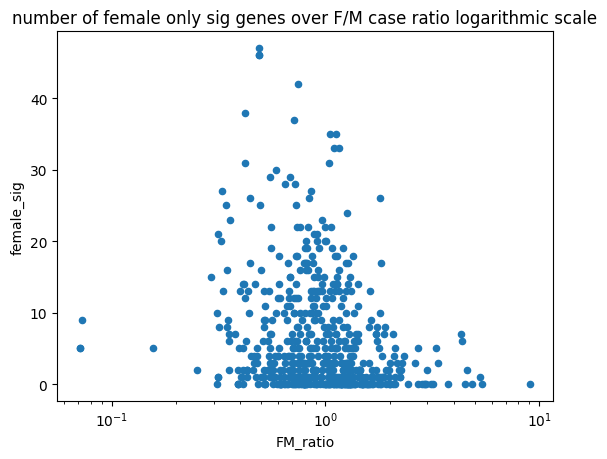

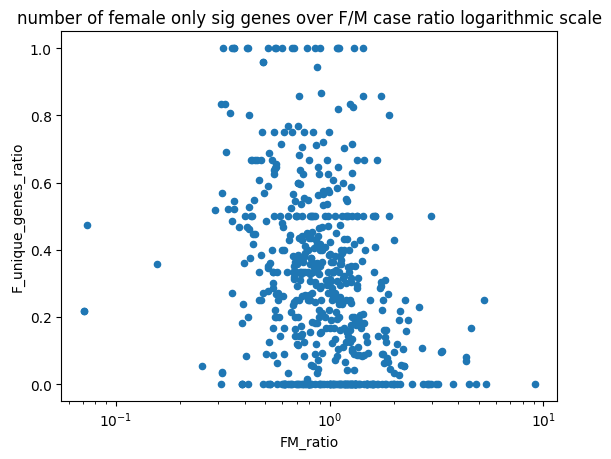

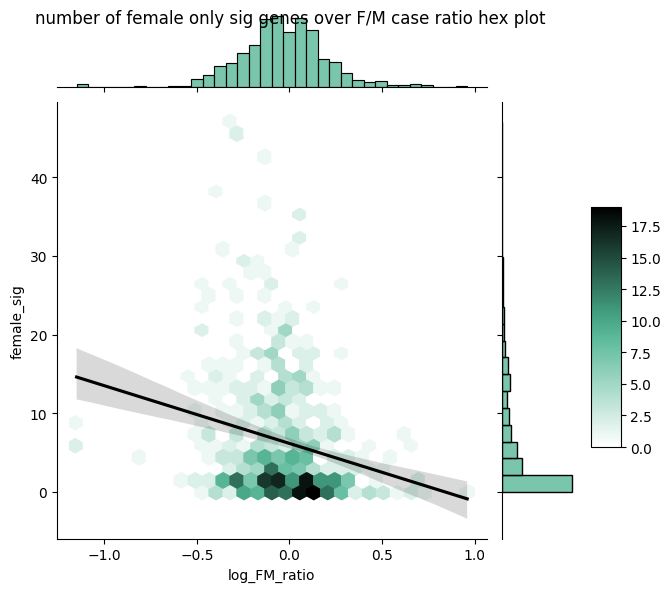

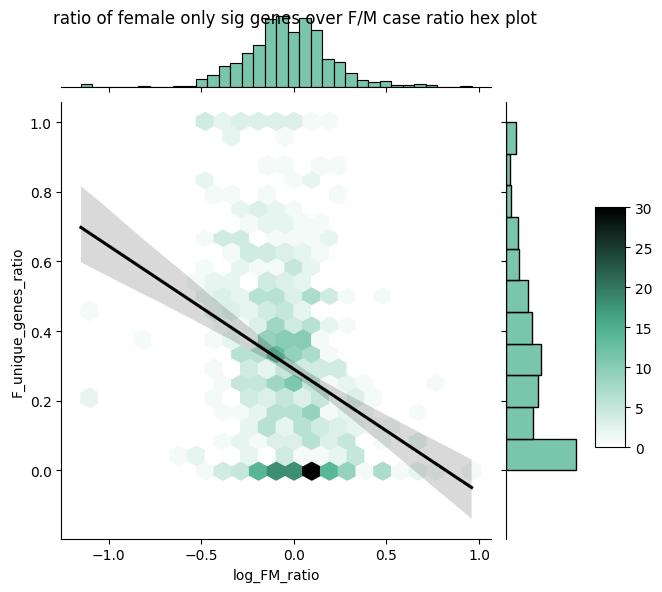

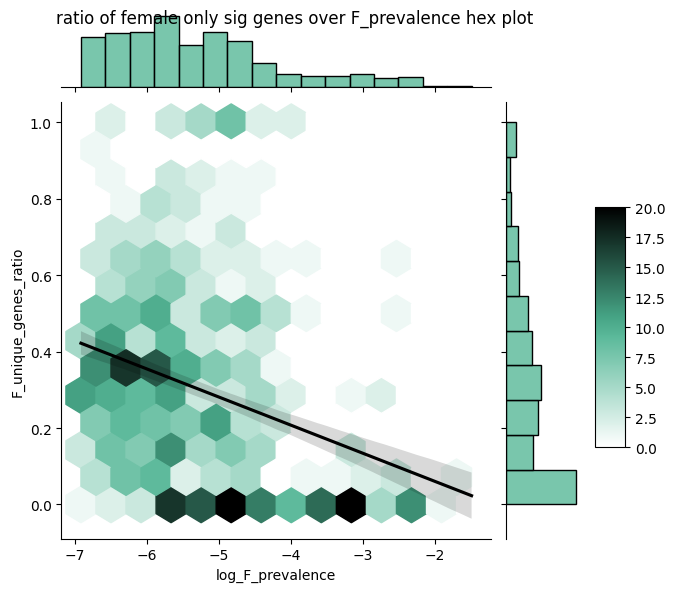

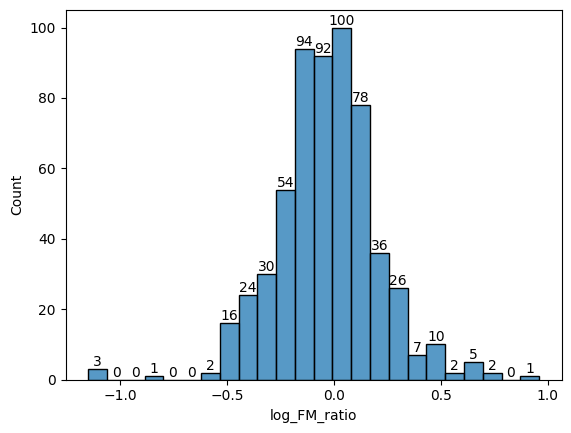

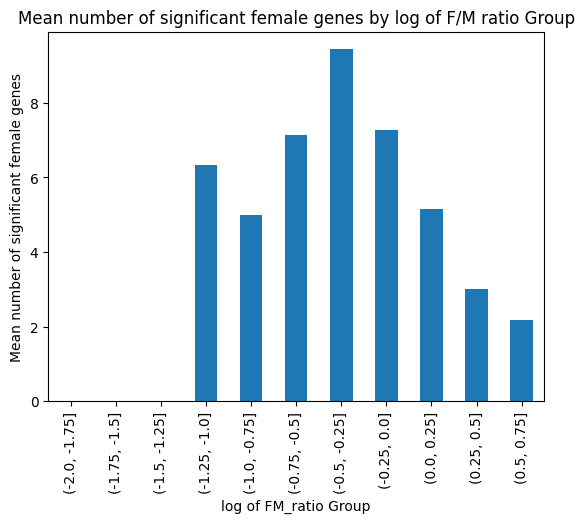

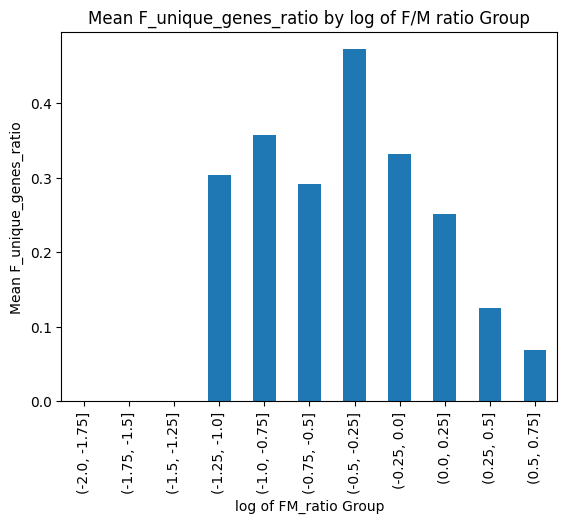

In [52]:
df = prepare_df(metrics)

plot_scatter_plot(df,'FM_ratio','female_sig',"number of female only sig genes over F/M case ratio logarithmic scale",True)

plot_scatter_plot(df,'FM_ratio','F_unique_genes_ratio',"number of female only sig genes over F/M case ratio logarithmic scale",True)


plot_hexplot(df,"log_FM_ratio","female_sig","number of female only sig genes over F/M case ratio hex plot",True)

plot_hexplot(df,"log_FM_ratio","F_unique_genes_ratio","ratio of female only sig genes over F/M case ratio hex plot",True)

plot_hexplot(df,"log_F_prevalence","F_unique_genes_ratio","ratio of female only sig genes over F_prevalence hex plot",True)

plot_histplot(df,"log_FM_ratio",24)

plot_mean_group_bar_plot(df,'log_FM_ratio','female_sig',list(np.arange(-2,1,0.25)),'log of FM_ratio Group',
                        'Mean number of significant female genes',
                         'Mean number of significant female genes by log of F/M ratio Group')

plot_mean_group_bar_plot(df,'log_FM_ratio','F_unique_genes_ratio',list(np.arange(-2,1,0.25)),'log of FM_ratio Group',
                        'Mean F_unique_genes_ratio',
                         'Mean F_unique_genes_ratio by log of F/M ratio Group')

# TODO: add plot with other mesurments of genetic signal
# TODO: add by prevelance, both filtering and as x axis
# TODO: add ratio of sig female from overall

In [24]:
df

,name,female_sig,male_sig,all_genes,female_cases,male_cases,both_cases,female_control,male_control,both_control,...,MF_ratio,log_MF_ratio,F_unique_genes_ratio,M_unique_genes_ratio,F_prevalence,M_prevalence,B_prevalence,log_F_prevalence,log_M_prevalence,log_B_prevalence
0,Phecode_8.0,0,0,3,4072,3106,7178,145111,122535,267646,...,0.762770,-0.117606,0.000000,0.000000,0.027295,0.024721,0.026119,-3.601039,-3.700093,-3.645110
1,Phecode_8.5,2,0,13,966,800,1766,148217,124841,273058,...,0.828157,-0.081887,0.153846,0.000000,0.006475,0.006367,0.006426,-5.039765,-5.056572,-5.047414
2,Phecode_8.52,7,18,27,335,323,658,148848,125318,274166,...,0.964179,-0.015842,0.259259,0.666667,0.002246,0.002571,0.002394,-6.098798,-5.963532,-6.034681
3,Phecode_8.6,1,10,23,485,403,888,148698,125238,273936,...,0.830928,-0.080437,0.043478,0.434783,0.003251,0.003208,0.003231,-5.728780,-5.742247,-5.734914
4,Phecode_38.2,12,3,25,191,319,510,148992,125322,274314,...,1.670157,0.222757,0.480000,0.120000,0.001280,0.002539,0.001856,-6.660656,-5.975993,-6.289475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,Phecode_960.0,0,4,5,2886,768,3654,146297,124873,271170,...,0.266112,-0.574935,0.000000,0.800000,0.019345,0.006113,0.013296,-3.945302,-5.097394,-4.320308
725,Phecode_965.1,0,14,16,1047,327,1374,148136,125314,273450,...,0.312321,-0.505399,0.000000,0.875000,0.007018,0.002603,0.005000,-4.959245,-5.951224,-5.298405
727,Phecode_426.91,2,0,3,745,1733,2478,148438,123908,272346,...,2.326174,0.366642,0.666667,0.000000,0.004994,0.013793,0.009017,-5.299545,-4.283575,-4.708679
728,Phecode_395.6,1,0,4,493,1035,1528,148690,124606,273296,...,2.099391,0.322093,0.250000,0.000000,0.003305,0.008238,0.005560,-5.712420,-4.799027,-5.192171


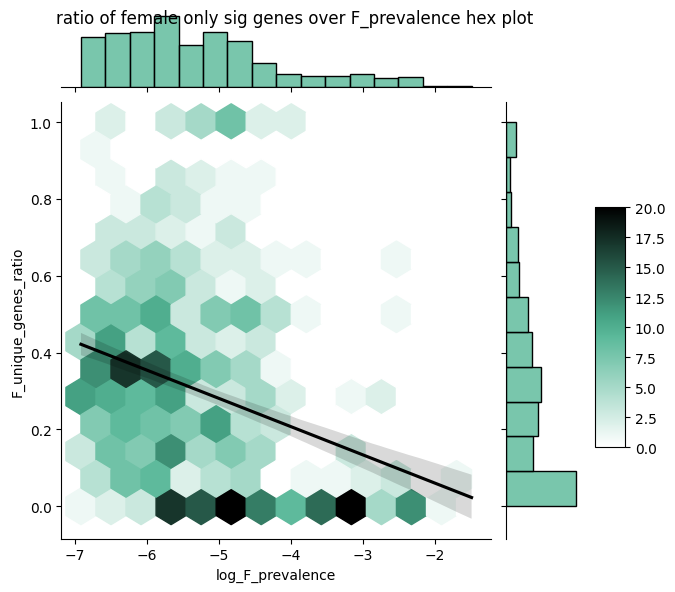

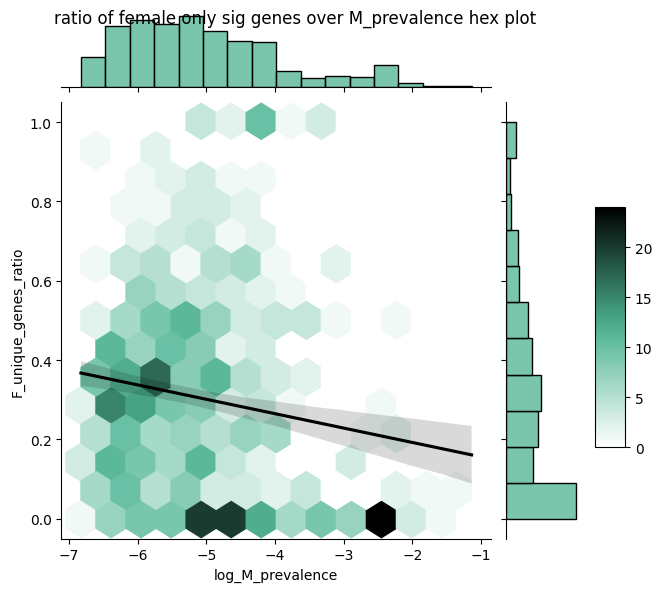

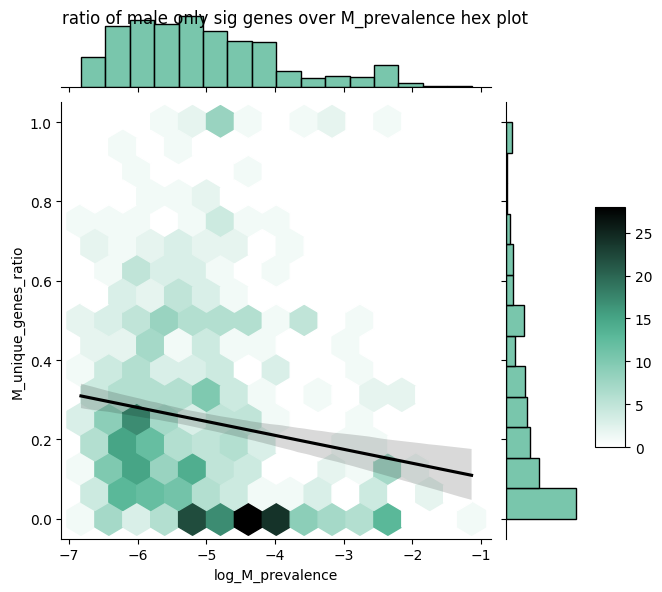

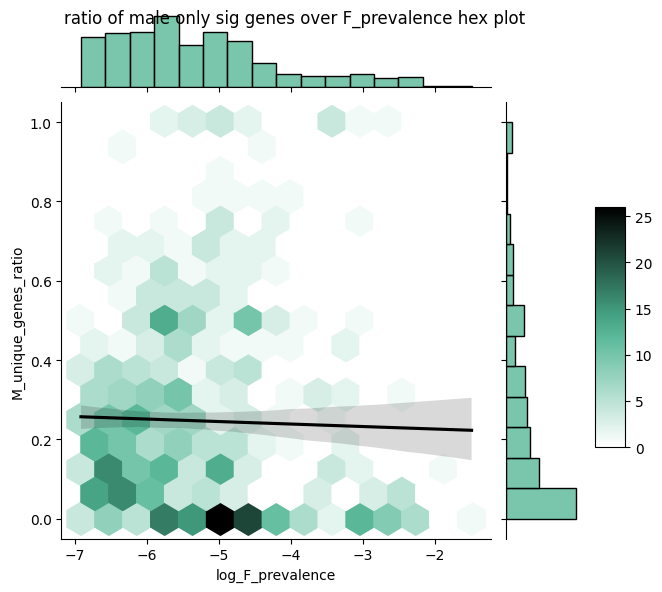

In [57]:
plot_hexplot(df,"log_F_prevalence","F_unique_genes_ratio","ratio of female only sig genes over F_prevalence hex plot",True)
plot_hexplot(df,"log_M_prevalence","F_unique_genes_ratio","ratio of female only sig genes over M_prevalence hex plot",True)
plot_hexplot(df,"log_M_prevalence","M_unique_genes_ratio","ratio of male only sig genes over M_prevalence hex plot",True)
plot_hexplot(df,"log_F_prevalence","M_unique_genes_ratio","ratio of male only sig genes over F_prevalence hex plot",True)

# plot_hexplot(df,"log_M_prevalence","M_unique_genes_ratio","ratio of male only sig genes over M_prevalence hex plot",True)


In [26]:
# plot_scatter_plot(df,'log_F_prevalence','F_unique_genes_ratio',"number of female only sig genes over F/M case ratio logarithmic scale")
# plot_hexplot(df,"log_F_prevalence","F_unique_genes_ratio","ratio of female only sig genes over F_prevalence hex plot")
# plot_hexplot(df,"log_F_prevalence","female_sig","ratio of female only sig genes over F_prevalence hex plot")
# plot_mean_group_bar_plot(df,'log_F_prevalence','F_unique_genes_ratio',list(np.arange(-7,-1,0.5)),'log_F_prevalence Group',
#                         'Mean F_unique_genes_ratio',
#                          'Mean F_unique_genes_ratio by log_F_prevalence Group')
# plot_histplot(df,"log_F_prevalence",24)

### MF ratio

In [27]:
# cols

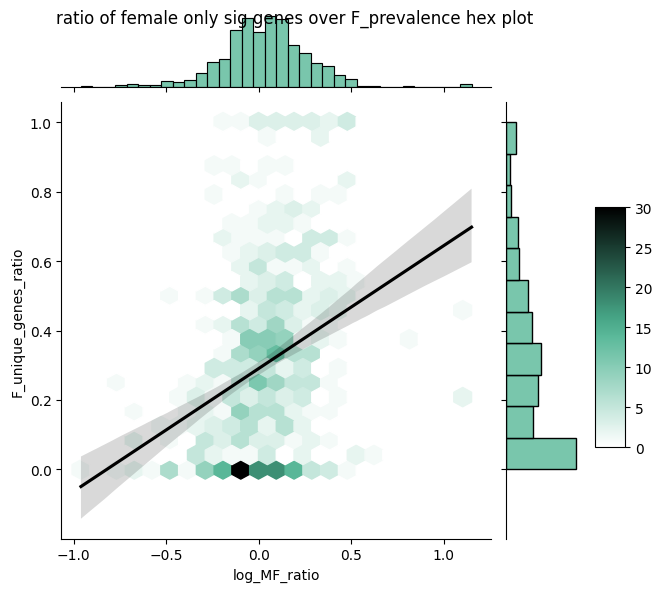

count 58
low male to female ratio
mean number of female sig genes 2.7241379310344827
mean number of male sig genes 8.293103448275861
mean male prevalence 0.006342235636346469
mean female prevalence 0.014604257164366745
high male to female ratio
mean number of female sig genes 8.655172413793103
mean number of male sig genes 2.0344827586206895
mean male prevalence 0.026142218565266283
mean female prevalence 0.006797830112379913


In [28]:
plot_hexplot(df,"log_MF_ratio","F_unique_genes_ratio","ratio of female only sig genes over F_prevalence hex plot",True)
count = int(len(df)*(10/100))
# count = 10
print("count",count)
print("low male to female ratio")
print("mean number of female sig genes",df.sort_values(by="FM_ratio").tail(count)["female_sig"].mean())
print("mean number of male sig genes",df.sort_values(by="FM_ratio").tail(count)["male_sig"].mean())
print("mean male prevalence",df.sort_values(by="FM_ratio").tail(count)["M_prevalence"].mean())
print("mean female prevalence",df.sort_values(by="FM_ratio").tail(count)["F_prevalence"].mean())

print("high male to female ratio")
print("mean number of female sig genes",df.sort_values(by="MF_ratio").tail(count)["female_sig"].mean())
print("mean number of male sig genes",df.sort_values(by="MF_ratio").tail(count)["male_sig"].mean())
print("mean male prevalence",df.sort_values(by="MF_ratio").tail(count)["M_prevalence"].mean())
print("mean female prevalence",df.sort_values(by="MF_ratio").tail(count)["F_prevalence"].mean())
# df.sort_values(by="FM_ratio").tail(10)

In [29]:
cols = list(df.columns)
# cols.remove("female_cases")
cols.remove("female_control")
cols.remove("male_control")
cols.remove("both_control")
cols.remove("both_cases")
df.sort_values(by="MF_ratio")[cols].tail(20)

,name,female_sig,male_sig,all_genes,female_cases,male_cases,FM_ratio,log_FM_ratio,MF_ratio,log_MF_ratio,F_unique_genes_ratio,M_unique_genes_ratio,F_prevalence,M_prevalence,B_prevalence,log_F_prevalence,log_M_prevalence,log_B_prevalence
142,Phecode_316.0,2,0,2,1345,3786,0.355256,-0.449458,2.814870,0.449458,1.000000,0.000000,0.009016,0.030133,0.018670,-4.708780,-3.502119,-3.980830
264,Phecode_442.1,9,1,33,183,522,0.350575,-0.455219,2.852459,0.455219,0.272727,0.030303,0.001227,0.004155,0.002565,-6.703443,-5.483516,-5.965688
66,Phecode_189.2,16,2,33,401,1152,0.348090,-0.458308,2.872818,0.458308,0.484848,0.060606,0.002688,0.009169,0.005651,-5.918968,-4.691929,-5.175942
365,Phecode_550.4,8,0,8,909,2612,0.348009,-0.458409,2.873487,0.458409,1.000000,0.000000,0.006093,0.020789,0.012812,-5.100584,-3.873312,-4.357386
239,Phecode_426.21,25,0,31,304,888,0.342342,-0.465539,2.921053,0.465539,0.806452,0.000000,0.002038,0.007068,0.004337,-6.195901,-4.952212,-5.440498
520,Phecode_726.3,13,3,25,199,598,0.332776,-0.477848,3.005025,0.477848,0.520000,0.120000,0.001334,0.004760,0.002900,-6.619624,-5.347593,-5.843031
245,Phecode_427.12,27,5,39,228,694,0.328530,-0.483425,3.043860,0.483425,0.692308,0.128205,0.001528,0.005524,0.003355,-6.483583,-5.198712,-5.697341
20,Phecode_150.0,20,1,24,205,630,0.325397,-0.487587,3.073171,0.487587,0.833333,0.041667,0.001374,0.005014,0.003038,-6.589919,-5.295464,-5.796454
555,Phecode_594.3,8,0,8,521,1642,0.317296,-0.498535,3.151631,0.498535,1.000000,0.000000,0.003492,0.013069,0.007870,-5.657179,-4.337514,-4.844635
522,Phecode_728.71,21,2,37,803,2561,0.313549,-0.503694,3.189290,0.503694,0.567568,0.054054,0.005383,0.020383,0.012241,-5.224574,-3.893031,-4.403000


In [30]:
df

,name,female_sig,male_sig,all_genes,female_cases,male_cases,both_cases,female_control,male_control,both_control,...,MF_ratio,log_MF_ratio,F_unique_genes_ratio,M_unique_genes_ratio,F_prevalence,M_prevalence,B_prevalence,log_F_prevalence,log_M_prevalence,log_B_prevalence
0,Phecode_8.0,0,0,3,4072,3106,7178,145111,122535,267646,...,0.762770,-0.117606,0.000000,0.000000,0.027295,0.024721,0.026119,-3.601039,-3.700093,-3.645110
1,Phecode_8.5,2,0,13,966,800,1766,148217,124841,273058,...,0.828157,-0.081887,0.153846,0.000000,0.006475,0.006367,0.006426,-5.039765,-5.056572,-5.047414
2,Phecode_8.52,7,18,27,335,323,658,148848,125318,274166,...,0.964179,-0.015842,0.259259,0.666667,0.002246,0.002571,0.002394,-6.098798,-5.963532,-6.034681
3,Phecode_8.6,1,10,23,485,403,888,148698,125238,273936,...,0.830928,-0.080437,0.043478,0.434783,0.003251,0.003208,0.003231,-5.728780,-5.742247,-5.734914
4,Phecode_38.2,12,3,25,191,319,510,148992,125322,274314,...,1.670157,0.222757,0.480000,0.120000,0.001280,0.002539,0.001856,-6.660656,-5.975993,-6.289475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,Phecode_960.0,0,4,5,2886,768,3654,146297,124873,271170,...,0.266112,-0.574935,0.000000,0.800000,0.019345,0.006113,0.013296,-3.945302,-5.097394,-4.320308
725,Phecode_965.1,0,14,16,1047,327,1374,148136,125314,273450,...,0.312321,-0.505399,0.000000,0.875000,0.007018,0.002603,0.005000,-4.959245,-5.951224,-5.298405
727,Phecode_426.91,2,0,3,745,1733,2478,148438,123908,272346,...,2.326174,0.366642,0.666667,0.000000,0.004994,0.013793,0.009017,-5.299545,-4.283575,-4.708679
728,Phecode_395.6,1,0,4,493,1035,1528,148690,124606,273296,...,2.099391,0.322093,0.250000,0.000000,0.003305,0.008238,0.005560,-5.712420,-4.799027,-5.192171


## Gene based view

In [31]:
curr_list_female = sorted(list(unique_counts_female.items()),key=lambda x:-x[1])
curr_list_male = sorted(list(unique_counts_male.items()),key=lambda x:-x[1])


In [32]:
curr_list_female[:5]

[('CYP4Z1', 8), ('DEFB124', 6), ('VLDLR', 6), ('PCYT1B', 6), ('PPP1R10', 6)]

In [33]:
def add_ratio(curr_list,overall_count):
    for i in range(len(curr_list)):
        curr_list[i] = list(curr_list[i])
        curr_list[i].append(curr_list[i][1] / overall_count[curr_list[i][0]])
add_ratio(curr_list_female,overall_count)
add_ratio(curr_list_male,overall_count)

In [34]:
def display(curr_list):
    female_above_five = list(map(lambda x:x[2],filter(lambda x:x[1]  >5,curr_list)))
    female_above_four = list(map(lambda x:x[2],filter(lambda x:x[1]  >4,curr_list)))
    female_above_one = list(map(lambda x:x[2],filter(lambda x:x[1]  >1,curr_list)))
    female_above_two = list(map(lambda x:x[2],filter(lambda x:x[1]  >2,curr_list)))
    
    female_all = list(map(lambda x:x[2],filter(lambda x:x[1]  >0,curr_list)))
    print("above 5 avarage:",sum(female_above_five) / len(female_above_five))
    print("above 0 avarage:",sum(female_all) / len(female_all))
display(curr_list_female)
display(curr_list_male)


above 5 avarage: 0.8528571428571429
above 0 avarage: 0.7727761962171741
above 5 avarage: 0.75
above 0 avarage: 0.7423416867419882


In [35]:
female_interesting_genes = sorted(filter(lambda x:x[1] > 3,curr_list_female),key=lambda x:-x[2])
female_interesting_genes
female_gene_set = set(map(lambda x:x[0],female_interesting_genes[:5]))

In [36]:
trios[0][0][0]

'Phecode_8.0'

In [37]:
def get_dict_for_genes(trios,genes : set,res_type = "uniprot_id"):
    res = dict()
    for trio in trios:
        curr = sorted(trio,key=lambda x:x[0])
        if curr[0][1] == -1 or curr[1][1] == -1 or curr[2][1] == -1:
            continue
        
        both_df = pd.read_csv(curr[0][2],nrows=int(curr[0][1]))
        both_df.dropna(subset=[res_type],inplace=True)
        both_set = set(both_df[both_df["fdr_significance"] == True][res_type])
        female_df = pd.read_csv(curr[1][2],nrows=int(curr[1][1]))
        female_df.dropna(subset=[res_type],inplace=True)
        female_set = set(female_df[female_df["fdr_significance"] == True][res_type])
        male_df = pd.read_csv(curr[2][2],nrows=int(curr[2][1]))
        male_df.dropna(subset=[res_type],inplace=True)
        male_set = set(male_df[male_df["fdr_significance"] == True][res_type])
        for female_u in (female_set - (both_set.union(male_set))):
            if female_u in genes:
                if female_u not in res.keys():
                    res[female_u] = []
                res[female_u].append(trio[0][0])
    return res
sig_genes_phens_res = get_dict_for_genes(trios,female_gene_set,"symbol")

#     print(both_df)

In [38]:
sig_genes_phens_res

{'PCYT1B': ['Phecode_189.21',
  'Phecode_433.0',
  'Phecode_401.22',
  'Phecode_447.1',
  'Phecode_503.0',
  'Phecode_447.0'],
 'NSD3': ['Phecode_204.2',
  'Phecode_531.0',
  'Phecode_531.3',
  'Phecode_747.1',
  'Phecode_854.0'],
 'HIC1': ['Phecode_250.23',
  'Phecode_250.7',
  'Phecode_361.1',
  'Phecode_362.7',
  'Phecode_447.1'],
 'ABCF1': ['Phecode_291.8',
  'Phecode_531.2',
  'Phecode_571.51',
  'ICD10_K746',
  'Phecode_571.81'],
 'XXYLT1': ['Phecode_442.1',
  'Phecode_530.3',
  'ICD10_K746',
  'Phecode_596.5',
  'Phecode_747.1']}

In [39]:
for val in female_interesting_genes:
    print(val)

['PCYT1B', 6, 1.0]
['NSD3', 5, 1.0]
['HIC1', 5, 1.0]
['ABCF1', 5, 1.0]
['XXYLT1', 5, 1.0]
['PPP1R1A', 5, 1.0]
['SORL1', 4, 1.0]
['RASGEF1B', 4, 1.0]
['DEFB123', 4, 1.0]
['SMIM7', 4, 1.0]
['CACNA2D3', 4, 1.0]
['COMMD7', 4, 1.0]
['TGM1', 4, 1.0]
['SAP18', 4, 1.0]
['CASP1', 4, 1.0]
['MYADM', 4, 1.0]
['MAX', 4, 1.0]
['SNAI3', 4, 1.0]
['NOA1', 4, 1.0]
['BCOR', 4, 1.0]
['DEFB124', 6, 0.8571428571428571]
['PPP1R10', 6, 0.8571428571428571]
['UBXN4', 5, 0.8333333333333334]
['CXXC5', 5, 0.8333333333333334]
['SH3PXD2A', 5, 0.8333333333333334]
['CYP4Z1', 8, 0.8]
['C5orf24', 4, 0.8]
['IL17RE', 4, 0.8]
['SOD1', 4, 0.8]
['PRPF3', 4, 0.8]
['CYLC1', 4, 0.8]
['BAMBI', 4, 0.8]
['VLDLR', 6, 0.75]
['BTLA', 5, 0.7142857142857143]
['AZIN1', 5, 0.7142857142857143]
['GRM3', 5, 0.7142857142857143]
['LRP12', 4, 0.6666666666666666]
['IGKV1-12', 4, 0.6666666666666666]
['NUDCD2', 4, 0.6666666666666666]
['SLIT2', 4, 0.6666666666666666]
['PRMT8', 4, 0.6666666666666666]
['CHTF8', 5, 0.625]
['BMPER', 4, 0.5714285714285

In [40]:
sig_genes_phens_res

{'PCYT1B': ['Phecode_189.21',
  'Phecode_433.0',
  'Phecode_401.22',
  'Phecode_447.1',
  'Phecode_503.0',
  'Phecode_447.0'],
 'NSD3': ['Phecode_204.2',
  'Phecode_531.0',
  'Phecode_531.3',
  'Phecode_747.1',
  'Phecode_854.0'],
 'HIC1': ['Phecode_250.23',
  'Phecode_250.7',
  'Phecode_361.1',
  'Phecode_362.7',
  'Phecode_447.1'],
 'ABCF1': ['Phecode_291.8',
  'Phecode_531.2',
  'Phecode_571.51',
  'ICD10_K746',
  'Phecode_571.81'],
 'XXYLT1': ['Phecode_442.1',
  'Phecode_530.3',
  'ICD10_K746',
  'Phecode_596.5',
  'Phecode_747.1']}

In [41]:
sorted(filter(lambda x:x[1] > 3,curr_list_male),key=lambda x:-x[2])

[['NPB', 5, 1.0],
 ['TLE4', 4, 1.0],
 ['HSD17B10', 4, 1.0],
 ['CALN1', 4, 1.0],
 ['RRP36', 4, 1.0],
 ['SGF29', 4, 1.0],
 ['MAP2K6', 4, 1.0],
 ['IL6R', 4, 1.0],
 ['IFI30', 4, 1.0],
 ['SIT1', 4, 1.0],
 ['WAS', 4, 1.0],
 ['GPRC5B', 4, 1.0],
 ['CDK2AP1', 4, 0.8],
 ['NME9', 4, 0.8],
 ['MINAR2', 6, 0.75],
 ['CSNK2A2', 4, 0.5714285714285714],
 ['C6orf47', 4, 0.17391304347826086]]

In [42]:
len(unique_counts_female)

2862

In [43]:
sorted_females = sorted(list(unique_counts_female.items()),key=lambda x:-x[1])
sorted_males = sorted(list(unique_counts_male.items()),key=lambda x:-x[1])

In [44]:
def Merge(dict1, dict2):
    for i in dict2.keys():
        dict1[i]=dict2[i]
    return dict1


In [45]:
df = pd.read_csv("/cs/usr/roeizucker/my_storage/thesis/signif.sbgenes.txt",sep="\t")
# requests.get(url, params={key: value}, args)
curr_dict = {}
for i in range(20):
    starting_loc = i*100
    end_loc = starting_loc+99
    genes_to_translate =  list(df["gene"].value_counts().sort_values(ascending=False)[starting_loc:end_loc].index)
    for i in range(len(genes_to_translate)):
        genes_to_translate[i] = genes_to_translate[i].split(".")[0]
    obj = {'api':1,"ids":genes_to_translate}
    url = "http://www.biotools.fr/human/ensembl_symbol_converter/?api=1&ids=["
    for val in genes_to_translate:
        url+="\"" + val + "\","
    url = url[:-1]
    url+="]"
    x = requests.get(url)
    # print(x.text)
    json_object = json.loads(x.text)
    Merge(curr_dict,json_object)
print(len(curr_dict))
diff_set = set(curr_dict.values())
# print(url)

1980


In [46]:
num_genes = len(sorted_females)
num_genes = 100
female_set = set(map(lambda x:x[0],sorted_females[:num_genes]))


In [47]:
print(len(female_set))
print(len(diff_set))
print(len(df["gene"].unique()))

100
1979
13294


In [48]:
# for gene in female_set:
#     print(gene)


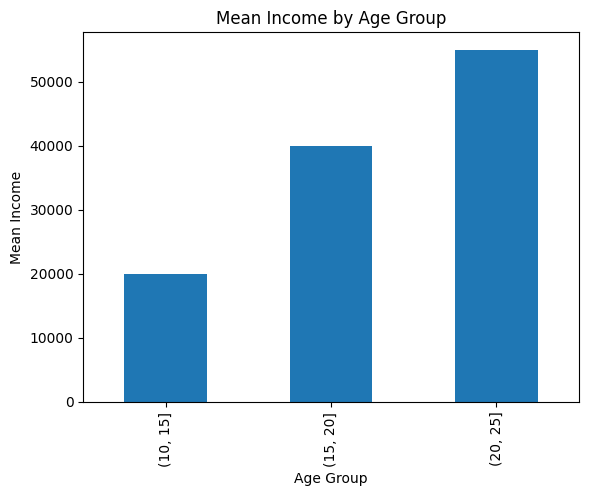

In [49]:
data = {'age': [13, 14, 15, 16, 17, 18, 19, 20, 21],
        'income': [15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000]}
df = pd.DataFrame(data)

# Define the age groups
age_groups = pd.cut(df['age'], bins=[10, 15, 20, 25])

# Group the data by age groups and calculate the mean income for each group
grouped_df = df.groupby(age_groups)['income'].mean()

# Create a bar plot of the mean income for each age group
grouped_df.plot(kind='bar')

# Set the x-axis labels to be the age group categories
plt.xticks(range(len(grouped_df.index)), grouped_df.index.categories)

# Add labels to the x and y axes and a title to the plot
plt.xlabel('Age Group')
plt.ylabel('Mean Income')
plt.title('Mean Income by Age Group')

# Show the plot
plt.show()


In [50]:
list(np.arange(-2,1,0.25))

[-2.0, -1.75, -1.5, -1.25, -1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75]